In [94]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [161]:
class DQNAgentModel(torch.nn.Module):
    def __init__(self, ip_size, op_size):
        super().__init__()
        self.net = torch.nn.Sequential(
                torch.nn.Linear(ip_size, op_size)
        )
    def forward(self, x):
        return self.net(x)

In [162]:
def myfun(x,y):
    return x+2*y+2


data = np.random.uniform(-10,10, (1000,2))
labels = np.array([myfun(x, y)+ np.random.normal() for x,y in data])

In [163]:
def get_random_data():
    indices = np.random.choice(len(data), batch_size)
    ip = torch.tensor(data[indices], dtype = torch.float)
    label = torch.tensor(labels[indices], dtype = torch.float)
    return ip, label
get_random_data()

(tensor([[ 7.0904, -2.7824],
         [-9.5575, -0.5330],
         [ 9.5866, -7.8846],
         [-9.2853, -6.4194]]),
 tensor([  2.4423,  -8.1366,  -3.2226, -19.7771]))

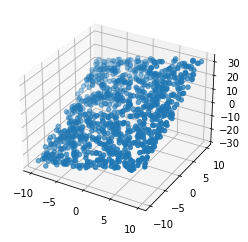

In [165]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], labels, 'gray')

In [168]:
batch_size = 4
lr = 0.0001

model = DQNAgentModel(2, 1)
model.train()

optim = torch.optim.SGD(lr = lr, params = model.parameters())
criterion = torch.nn.MSELoss()
steps = 100000

In [169]:
losses = []
for step in range(steps):
    optim.zero_grad()
    ip, label = get_random_data()
    pred = model(ip).squeeze()
    loss = criterion(label, pred)
    loss.backward()
    losses.append(loss.item())
    if step % 1000 == 0:
        print(f'{step}: loss = {loss}, model = {model.net[0].weight.data},{model.net[0].bias.data}')
    
    optim.step()

0: loss = 181.72711181640625, model = tensor([[-0.2551, -0.4105]]),tensor([0.0693])
1000: loss = 5.56129264831543, model = tensor([[0.9835, 1.9974]]),tensor([0.4100])
2000: loss = 2.0580668449401855, model = tensor([[0.9925, 1.9987]]),tensor([0.6985])
3000: loss = 1.07405686378479, model = tensor([[0.9759, 2.0000]]),tensor([0.9328])
4000: loss = 3.6928036212921143, model = tensor([[0.9862, 2.0101]]),tensor([1.1248])
5000: loss = 3.0731425285339355, model = tensor([[0.9946, 2.0023]]),tensor([1.2826])
6000: loss = 2.8320372104644775, model = tensor([[0.9849, 2.0070]]),tensor([1.4135])
7000: loss = 1.8749618530273438, model = tensor([[0.9825, 2.0015]]),tensor([1.5187])
8000: loss = 0.13791018724441528, model = tensor([[0.9945, 2.0066]]),tensor([1.6022])
9000: loss = 0.5940124988555908, model = tensor([[0.9881, 2.0048]]),tensor([1.6744])
10000: loss = 0.49968570470809937, model = tensor([[0.9934, 2.0023]]),tensor([1.7368])
11000: loss = 0.5178984999656677, model = tensor([[0.9925, 1.9995]]

96000: loss = 1.332738995552063, model = tensor([[0.9955, 1.9948]]),tensor([2.0061])
97000: loss = 0.8765870332717896, model = tensor([[1.0045, 1.9984]]),tensor([2.0017])
98000: loss = 0.4494439363479614, model = tensor([[0.9893, 1.9877]]),tensor([2.0040])
99000: loss = 1.756884217262268, model = tensor([[0.9984, 2.0033]]),tensor([2.0064])


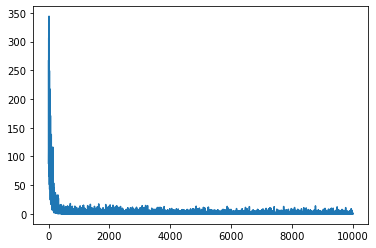

In [150]:

plt.plot(losses)